In [1]:
import pandas as pd

# Creating a variable to initially read in dataset for project.
eegDatasetCleaned = pd.read_csv('eegDatasetCleanedForModel.csv')

In [2]:
# Observing cleaned EEG dataset and prints the first 5 rows.
print('\n EEG DATA SET HEAD, \n----------------------------------------------------\n')
print(eegDatasetCleaned.head(5))


 EEG DATA SET HEAD, 
----------------------------------------------------

     specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
0  acuteStressDisorder         30.323572         29.558049        25.293659   
1  acuteStressDisorder         23.327612         34.845856        26.757280   
2  acuteStressDisorder         17.252066         15.155292        16.108600   
3  acuteStressDisorder         34.912317         39.136562        34.103989   
4  acuteStressDisorder          8.520262          9.073504        10.481318   

   AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
0        25.431386        27.157943        26.064096        26.962306   
1        17.888937        18.073537        17.885986        19.711728   
2        18.438291        27.098033        19.733524        11.736709   
3        36.462923        37.904649        42.758987        38.002407   
4        16.898775        11.355207        10.495163        10.468839   

   AB.A.de

In [3]:
# Prints information about the EEG dataset.
eegDatasetCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1141 entries, specific.disorder to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140), object(1)
memory usage: 8.2+ MB


In [4]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG DATA SET SHAPE,\n----------------------------------------------------\n')
print('EEG dataset shape: \n', eegDatasetCleaned.shape)


 EEG DATA SET SHAPE,
----------------------------------------------------

EEG dataset shape: 
 (945, 1141)


In [5]:
# Checks data for missing values and spits a sum of entries missing
print('\n EEG DATA SET CHECK FOR MISSING ENTRIES, \n----------------------------------------------------\n')
print('Number of missing entries: ', eegDatasetCleaned.isnull().sum())


 EEG DATA SET CHECK FOR MISSING ENTRIES, 
----------------------------------------------------

Number of missing entries:  specific.disorder        0
AB.A.delta.a.FP1         0
AB.A.delta.b.FP2         0
AB.A.delta.c.F7          0
AB.A.delta.d.F3          0
                        ..
COH.F.gamma.p.P4.r.O1    0
COH.F.gamma.p.P4.s.O2    0
COH.F.gamma.q.T6.r.O1    0
COH.F.gamma.q.T6.s.O2    0
COH.F.gamma.r.O1.s.O2    0
Length: 1141, dtype: int64


In [6]:
# To observe the range of disorders available in the data the following code is used.
eegDatasetCleaned['specific.disorder'].unique()

array(['acuteStressDisorder', 'adjustmentDisorder', 'alcoholUseDisorder',
       'behavioralAddictionDisorder', 'bipolarDisorder',
       'depressiveDisorder', 'healthyControl',
       'obsessiveCompulsiveDisorder', 'panicDisorder',
       'posttraumaticStressDisorder', 'schizophrenia',
       'socialAnxietyDisorder'], dtype=object)

In [7]:
# Counts the number of each disorder recorded.
disorderOccurrence = eegDatasetCleaned.groupby(['specific.disorder']).size()
print('\n EEG DISORDER OCCURRENCES COUNT, \n----------------------------------------------------\n')
print(disorderOccurrence)


 EEG DISORDER OCCURRENCES COUNT, 
----------------------------------------------------

specific.disorder
acuteStressDisorder             38
adjustmentDisorder              38
alcoholUseDisorder              93
behavioralAddictionDisorder     93
bipolarDisorder                 67
depressiveDisorder             199
healthyControl                  95
obsessiveCompulsiveDisorder     46
panicDisorder                   59
posttraumaticStressDisorder     52
schizophrenia                  117
socialAnxietyDisorder           48
dtype: int64


In [8]:
# As the model is only able to handle numeric data I had to convert the strings into integers so they could be processed.
# With the disorders converted to integers I next replaced the current strings with the new updated integer values.
eegDatasetCleaned['specific.disorder'] = eegDatasetCleaned['specific.disorder'].replace({
    'healthyControl':0,
    'acuteStressDisorder':1, 
    'adjustmentDisorder':2, 
    'alcoholUseDisorder':3,
    'behavioralAddictionDisorder':4, 
    'bipolarDisorder':5,
    'depressiveDisorder':6, 
    'obsessiveCompulsiveDisorder':7, 
    'panicDisorder':8,
    'posttraumaticStressDisorder':9, 
    'schizophrenia':10,
    'socialAnxietyDisorder':11
})

In [9]:
eegDatasetCleaned

,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,30.323572,29.558049,25.293659,25.431386,27.157943,26.064096,26.962306,16.140803,17.928469,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,1,23.327612,34.845856,26.757280,17.888937,18.073537,17.885986,19.711728,8.810296,16.205385,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,1,17.252066,15.155292,16.108600,18.438291,27.098033,19.733524,11.736709,11.327534,17.173299,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,1,34.912317,39.136562,34.103989,36.462923,37.904649,42.758987,38.002407,26.303330,32.681753,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,1,8.520262,9.073504,10.481318,16.898775,11.355207,10.495163,10.468839,9.622323,10.772125,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,11,17.585491,16.912154,16.676674,16.432607,12.560949,12.451371,12.126499,10.044354,9.446693,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,11,21.393045,23.018120,21.406082,22.840180,18.802283,19.366903,25.692413,10.097856,14.600330,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,11,19.543898,18.035856,20.696263,17.510941,19.099672,16.940304,15.605748,9.916546,15.404386,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,11,11.581630,16.528605,12.079624,19.150356,11.189703,10.523212,8.997941,5.713006,9.971759,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


In [10]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithOutDisorder = eegDatasetCleaned.loc[:, eegDatasetCleaned.columns != 'specific.disorder']

In [15]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as PathEffects
import pickle
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from copy import deepcopy
from tqdm import tqdm



In [15]:
def sep_to_bin(features, target, target_ord, disorders, hc_id=0):
    assert len(features) == len(target)
    X = dict()
    Y = dict()
    for disorder in disorders:
        # find how target was coded
        disorder_id = np.where(target_ord == disorder)[0][0]
        # extract targets
        y = target[target.isin([hc_id, disorder_id])]
        y[y != hc_id] = 1
        # features
        x = features.loc[y.index]
        # save
        X[disorder] = x
        Y[disorder] = y
    return X, Y

def min_validation(features, target_name, disorders, hc_name='Healthy control'):
    # count number of rows per each target value
    counts = df[target_name].value_counts()
    # initialize result
    result = np.zeros(len(disorders), dtype='bool')
    for i, disorder in enumerate(disorders):
        # calculate size of dataset: disorder + healthy control
        hc_disorder_count = counts[hc_name] + counts[disorder]
        # update result
        result[i] = len(features[disorder]) == hc_disorder_count
    return result

# separate to binary classification subsets
Xsd, Ysd = sep_to_bin(X, sd_target, sd_ord, sd)

# validate length of subsets
assert min_validation(Xsd, 'specific.disorder', sd).all()


NameError: name 'X' is not defined

In [ ]:
def lists_to_dict (keys, items):
    return {key: item for key,item in zip(keys, items)}

# models names
model_names = ['EN', 'SVM', 'RF', 'XGB', 'LGBM', 'CatBoost']
# param grids for gridsearch
param_grids = [
    {
        'l1_ratio': np.linspace(0, 1, 5),
        'C': [0.5, 1, 5, 10]
    },
    {
        'C': [0.5, 1, 5, 10]
    },
    {
        'n_estimators': [100, 300, 500],
        'max_depth': [1, 3, 6, None]
    },
    {
        'n_estimators': [100, 300, 500],
        'subsample': [0.3, 0.5, 1],
        'max_depth': [1, 3, 6, None]
    },
    {
        'n_estimators': [100, 300, 500],
        'subsample': [0.3, 0.5, 1],
        'max_depth': [1, 3, 6, None]
    },
    {
        'n_estimators': [100, 300, 500],
        'max_depth': [1, 3, 6, None], 
        
    }  
]
param_grids = lists_to_dict(model_names, param_grids)

# models for gridsearch
models = [
    LogisticRegression(penalty='elasticnet', solver='saga'),
    SVC(kernel='linear', random_state=77),
    RandomForestClassifier(random_state=77),
    XGBClassifier(),#tree_method='gpu_hist'),
    LGBMClassifier(random_state=77), #device='gpu'),
    CatBoostClassifier(random_seed=77,logging_level='Silent')#,task_type='GPU')
]
models = lists_to_dict(model_names, models)

In [11]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(eegTrainingDataWithOutDisorder, eegDatasetCleaned['specific.disorder'], test_size=0.3, random_state=42)

In [12]:
from sklearn import linear_model

# Creating logistic regression model object to be trained later.
# Issue converging with max number of iterations with link to - https://scikit-learn.org/stable/modules/preprocessing.html
model = linear_model.LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000)

In [13]:
# Train the data by calling the fit method with the data from X axis and Y axis training dataset specified above
model.fit(X_train, y_train)

ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

In [ ]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
model.score(X_test, y_test)

In [27]:
# With the model accuracy tested I want to make an actual prediction with the method below.
model.predict(X_test)

array([11,  6,  5,  9,  2,  4,  5,  4,  6,  9, 11,  5, 11,  3,  6,  6,  9,
        6,  3,  7, 11, 12, 11,  6,  3,  6,  4,  2,  3,  8,  3,  6, 11,  6,
        4, 11, 10,  4,  6, 12,  6,  4,  8,  4,  4, 11,  7,  6,  6,  4,  6,
        6,  6, 11, 12, 11, 11,  7,  6,  7, 12, 11, 12,  6, 11,  6,  4,  1,
        5,  4, 11,  6, 10, 11,  3,  8,  8,  5,  9,  8,  6,  2,  6,  9,  8,
        6, 11,  6,  4,  6,  4,  7,  6,  2, 11,  6,  6,  6,  7, 10,  3,  7,
        8, 12, 11,  6,  9,  6,  6,  3, 11,  3,  5,  5,  3,  3, 10, 10,  6,
        6,  7, 12, 11,  2,  3,  8,  6,  4,  4,  6, 10,  5,  1,  4,  8,  6,
        3,  4,  9,  3,  9,  6,  6,  3,  9, 11,  3, 11,  6,  7,  5, 11,  7,
       11,  6,  5,  4,  5,  6, 11, 12,  3,  4,  4, 11,  6,  3,  5,  7,  1,
        4, 10,  8, 11,  9,  6,  3,  6,  6,  5,  5, 10,  9,  6,  6,  7, 11,
        7,  2, 11,  1,  9, 11,  3,  6,  2,  4,  6,  4,  3,  3,  8,  7, 11,
        6,  6, 10,  3,  1,  9, 11, 11, 12, 11,  5,  6,  3,  4,  6, 11,  2,
       11,  7, 10,  4,  5

In [40]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[ 0,  0,  0,  3,  1,  3,  0,  1,  1,  1,  0,  0],
       [ 0,  0,  0,  2,  0,  3,  3,  0,  0,  1,  4,  0],
       [ 0,  2,  4,  2,  0,  4,  2,  3,  3,  1,  3,  1],
       [ 1,  1,  2,  4,  2,  9,  0,  1,  1,  1,  3,  1],
       [ 3,  0,  6,  4,  4,  8,  0,  1,  0,  1,  1,  0],
       [ 1,  5,  5,  4,  5, 25,  6,  3,  0,  0,  6,  1],
       [ 0,  2,  4,  1,  2,  9,  4,  2,  1,  1,  5,  0],
       [ 0,  1,  0,  0,  0,  1,  2,  0,  1,  1,  6,  0],
       [ 0,  1,  1,  3,  1,  1,  1,  3,  3,  1,  3,  1],
       [ 0,  0,  1,  1,  1,  0,  0,  0,  3,  1,  4,  0],
       [ 0,  1,  5,  1,  3,  8,  1,  2,  2,  3,  6,  2],
       [ 0,  0,  1,  3,  1,  3,  0,  0,  1,  0,  0,  5]], dtype=int64)

Text(87.0, 0.5, 'True value')

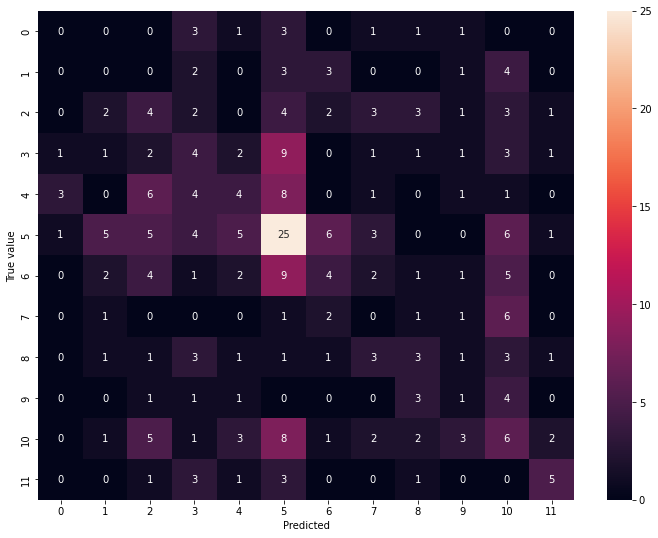

In [42]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')